## Image Augmentation 

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import random
import os
os.getcwd()

from os import listdir
from os.path import isfile, join

import cv2
import numpy as np
import imutils

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Checking No of Training Images before Augmentation

In [17]:
saree_path = '/content/drive/My Drive/Train_data/sarees'
jeans_path = '/content/drive/My Drive/Train_data/Men Jeans'
trouser_path = '/content/drive/My Drive/Train_data/Trousers'

print('Total training saree images:', len(os.listdir(saree_path)))
print('Total training Jeans images:', len(os.listdir(jeans_path)))
print('Total training Trouser images:', len(os.listdir(trouser_path)))

saree_name = [os.path.join(saree_path, f) for f in os.listdir(saree_path) if os.path.isfile(os.path.join(saree_path, f))]
Jeans_name = [os.path.join(jeans_path, f) for f in os.listdir(jeans_path) if os.path.isfile(os.path.join(jeans_path, f))]
Trouser_name = [os.path.join(trouser_path, f) for f in os.listdir(trouser_path) if os.path.isfile(os.path.join(trouser_path, f))]

Total training saree images: 100
Total training Jeans images: 100
Total training Trouser images: 99


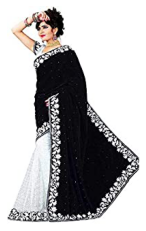

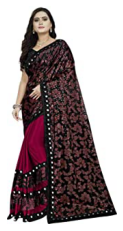

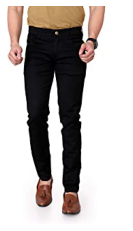

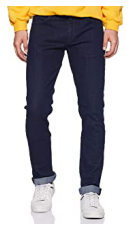

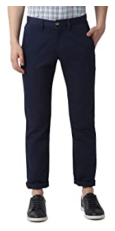

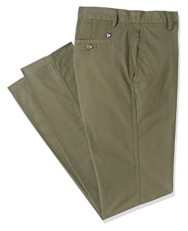

In [18]:
pic_index = 2

next_saree= [os.path.join(saree_path, fname) 
                for fname in saree_name[pic_index-2:pic_index]]
next_Jeans = [os.path.join(jeans_path, fname) 
                for fname in Jeans_name[pic_index-2:pic_index]]
next_Trousers = [os.path.join(trouser_path, fname) 
                for fname in Trouser_name[pic_index-2:pic_index]]

for i, img_path in enumerate(next_saree+next_Jeans+next_Trousers):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [19]:
#creating a list of location
saree = '/content/drive/My Drive/Train_data/sarees/*.jpeg'
jeans = '/content/drive/My Drive/Train_data/Men Jeans/*.jpeg'
trouser = '/content/drive/My Drive/Train_data/Trousers/*.jpeg'
file_loc = [saree,jeans,trouser]

# Augmentation (Rotation,brightness,Flip,Sharpening)

In [20]:
import glob
for loc in file_loc:
    images = glob.glob(loc)
    print('Getting input from : ',loc)
    path=input('Enter the path where to save the image in form of directory/img- : ')

    i=101
    for image in images:
        img = cv2.imread(image)
        
        #apply rotating +30
        h,w =img.shape[:2]
        center=(w//2,h//2)
        M= cv2.getRotationMatrix2D(center,30,0.5)
        rotated_img = cv2.warpAffine(img,M,(w,h))
        cv2.imwrite('/content/drive/My Drive/Train_data/'+str(path)+str(i)+'.jpeg',rotated_img)
        i=i+1
        
        #applying rotating by -30
        M= cv2.getRotationMatrix2D(center,-30,0.5)
        rotated_img = cv2.warpAffine(img,M,(w,h))
        cv2.imwrite('/content/drive/My Drive/Train_data/'+str(path)+str(i)+'.jpeg',rotated_img)
        i=i+1
        
        #increasing brightness
        matrix = np.ones(img.shape, dtype='uint8')*75
        brighten = cv2.add(img,matrix)
        cv2.imwrite('/content/drive/My Drive/Train_data/'+str(path)+str(i)+'.jpeg',brighten)
        i=i+1

        #decreasing brightness
        matrix = np.ones(img.shape, dtype='uint8')*75
        darken = cv2.subtract(img,matrix)
        cv2.imwrite('/content/drive/My Drive/Train_data/'+str(path)+str(i)+'.jpg',darken)
        i=i+1
        
        # flipping image horizontally
        flph =cv2.flip(img,1)
        cv2.imwrite('/content/drive/My Drive/Train_data/'+str(path)+str(i)+'.jpg',flph)
        i=i+1
        
        #sharpening
        kernel_sharpening = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
        sharpened_img=cv2.filter2D(img,-1,kernel_sharpening)
        cv2.imwrite('/content/drive/My Drive/Train_data/'+str(path)+str(i)+'.jpg',sharpened_img)
        i=i+1

Getting input from :  /content/drive/My Drive/Train_data/sarees/*.jpeg
Enter the path where to save the image in form of directory/img- : sarees/aug-
Getting input from :  /content/drive/My Drive/Train_data/Men Jeans/*.jpeg
Enter the path where to save the image in form of directory/img- : Men Jeans/aug-
Getting input from :  /content/drive/My Drive/Train_data/Trousers/*.jpeg
Enter the path where to save the image in form of directory/img- : Trousers/aug-


# Total Training Images after Augmentation

In [21]:
saree_path = '/content/drive/My Drive/Train_data/sarees'
jeans_path = '/content/drive/My Drive/Train_data/Men Jeans'
trouser_path = '/content/drive/My Drive/Train_data/Trousers'

print('Total training saree images:', len(os.listdir(saree_path)))
print('Total training Jeans images:', len(os.listdir(jeans_path)))
print('Total training Trouser images:', len(os.listdir(trouser_path)))

saree_name = [os.path.join(saree_path, f) for f in os.listdir(saree_path) if os.path.isfile(os.path.join(saree_path, f))]
Jeans_name = [os.path.join(jeans_path, f) for f in os.listdir(jeans_path) if os.path.isfile(os.path.join(jeans_path, f))]
Trouser_name = [os.path.join(trouser_path, f) for f in os.listdir(trouser_path) if os.path.isfile(os.path.join(trouser_path, f))]

Total training saree images: 700
Total training Jeans images: 700
Total training Trouser images: 693
